In [33]:
# Нужные библиотеки.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
# Загружаем .csv таблицу.
input_file = "../build/out.csv"
df = pd.read_csv(input_file, sep=";")

In [35]:
# Строит графики с отображением времени работы алгоритмов поиска.
def plot_duration(text_generator: str, text_length: int, wildcards: bool):
    filtered_df = df[(df["text_generator"] == text_generator) & (df["text_length"] == text_length) & (df["wildcards"] == wildcards)]
    for searcher in filtered_df["searcher"].unique():
        plt.plot(filtered_df[filtered_df["searcher"] == searcher]["pattern_length"], 
                 filtered_df[filtered_df["searcher"] == searcher]["test_result_duration_nano"], 
                 label=searcher)
    plt.grid()
    plt.legend()
    plt.xlabel("Длина паттерна (число символов)")
    plt.ylabel("Время, нс.")
    plt.title(f"{'4 символа' if wildcards else 'без символов'} подстановки, {text_length} символов, {text_generator} алфавит")
    plt.show()

In [36]:
# Строит графики с отображением количества посимвольных сравнений для алгоритмов поиска.
def plot_char_comparisons(text_generator: str, text_length: int, wildcards: bool):
    filtered_df = df[(df["text_generator"] == text_generator) & (df["text_length"] == text_length) & (df["wildcards"] == wildcards)]
    for searcher in filtered_df["searcher"].unique():
        plt.plot(filtered_df[filtered_df["searcher"] == searcher]["pattern_length"], 
                 filtered_df[filtered_df["searcher"] == searcher]["test_result_char_comparisons"], 
                 label=searcher)
    plt.grid()
    plt.legend()
    plt.xlabel("Длина паттерна (число символов)")
    plt.ylabel("Количество сравнений")
    plt.title(f"{'4 символа' if wildcards else 'без символов'} подстановки, {text_length} символов, {text_generator} алфавит")
    plt.show()

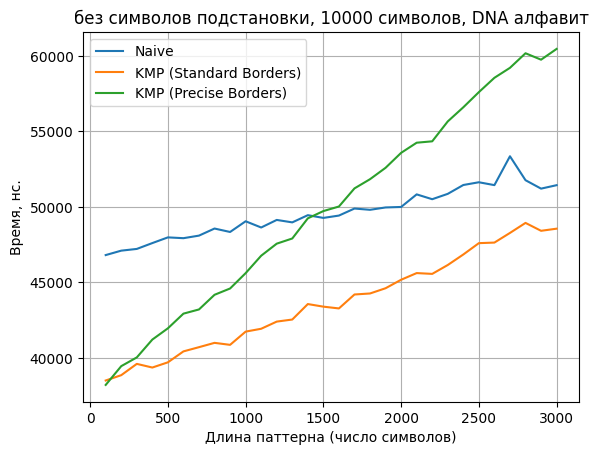

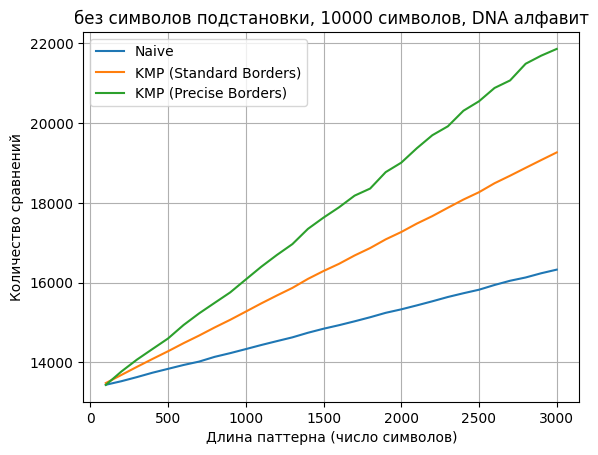

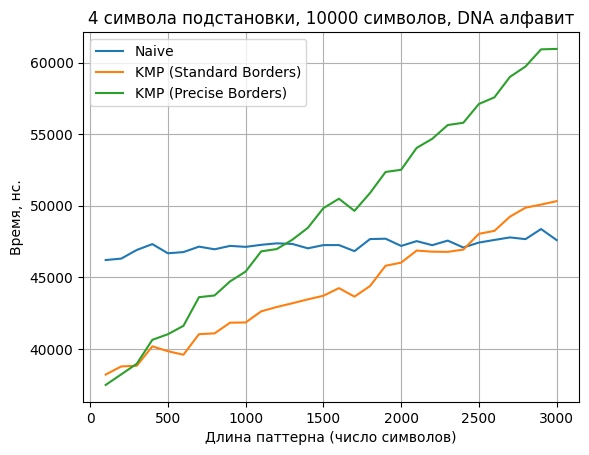

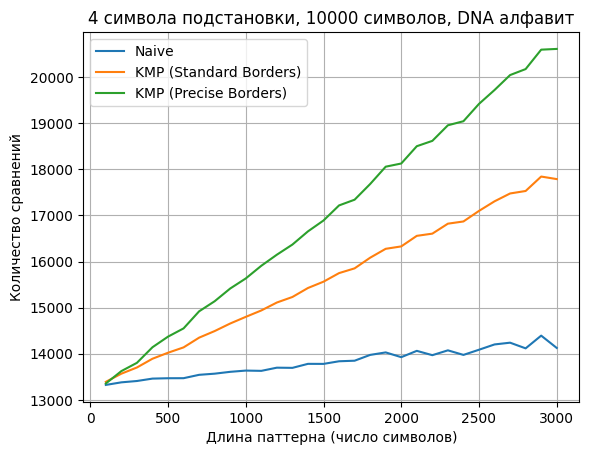

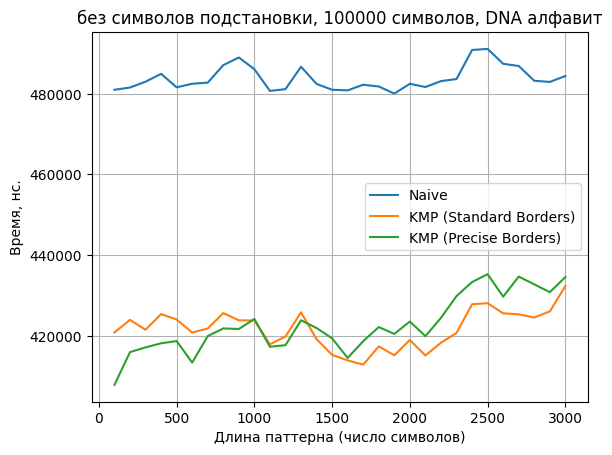

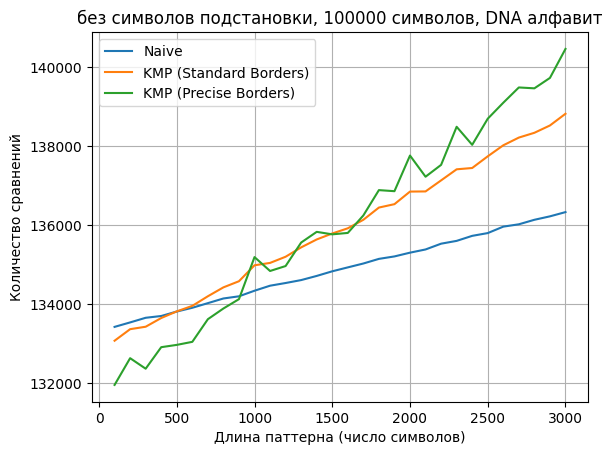

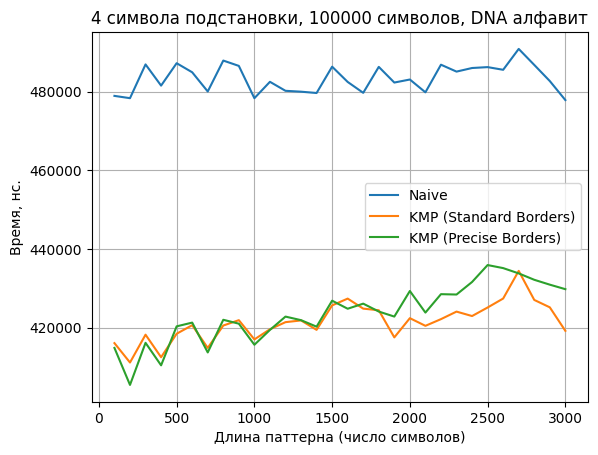

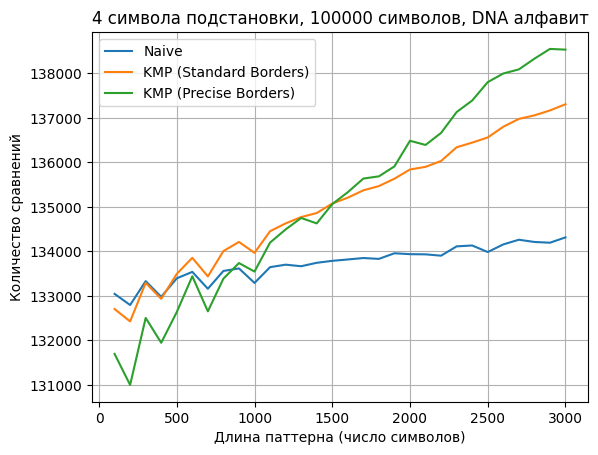

In [37]:

for text_generator in df["text_generator"].unique():
    for text_length in df["text_length"].unique():
        for wildcards in df["wildcards"].unique():
            plot_duration(text_generator, text_length, wildcards)
            plot_char_comparisons(text_generator, text_length, wildcards)